In [172]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
%matplotlib inline

# suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

import numpy as np
# maximum print option
np.set_printoptions(linewidth=400)

from model import Schelling

In [173]:
model = Schelling(width = 50, height = 50, density = 0.75, minority_pc = 0.4, homophily = 2, k = 5,  policy = 'relevance', follow_policy=0.5)

[[0.16817928 0.16986905 0.17157284 ... 0.17328745 0.17157284 0.16986905]
 [0.16986905 0.17164726 0.17344406 ... 0.17525626 0.17344406 0.17164726]
 [0.17157284 0.17344406 0.17533902 ... 0.17725465 0.17533902 0.17344406]
 ...
 [0.17328745 0.17525626 0.17725465 ... 0.17927972 0.17725465 0.17525626]
 [0.17157284 0.17344406 0.17533902 ... 0.17725465 0.17533902 0.17344406]
 [0.16986905 0.17164726 0.17344406 ... 0.17525626 0.17344406 0.17164726]]


In [174]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps)  # Show how many steps have actually run

step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
12


In [175]:
model_out = model.datacollector.get_model_vars_dataframe()

In [176]:
model_out

,perc_happy,segregation
0,0.847884,0.440011
1,0.931976,0.461703
2,0.957686,0.475094
3,0.975362,0.481119
4,0.983931,0.486342
5,0.989823,0.491028
6,0.994108,0.491966
7,0.996786,0.493171
8,0.997858,0.493439
9,0.998929,0.493840


(0.8478843063738618, 1.0)

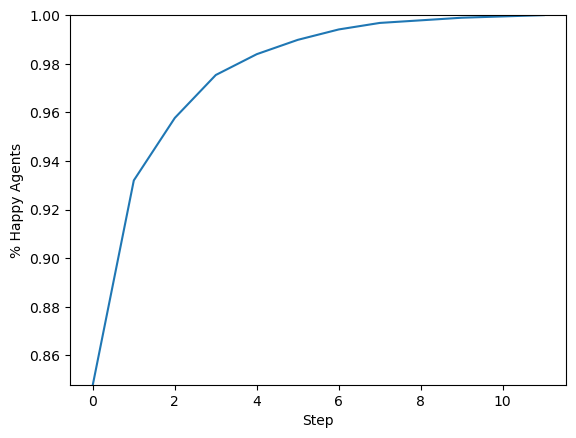

In [177]:
model_out.perc_happy.plot()
plt.xlabel("Step")
plt.ylabel("% Happy Agents")
plt.ylim(min(model_out.perc_happy),1)


Text(0, 0.5, '<S>')

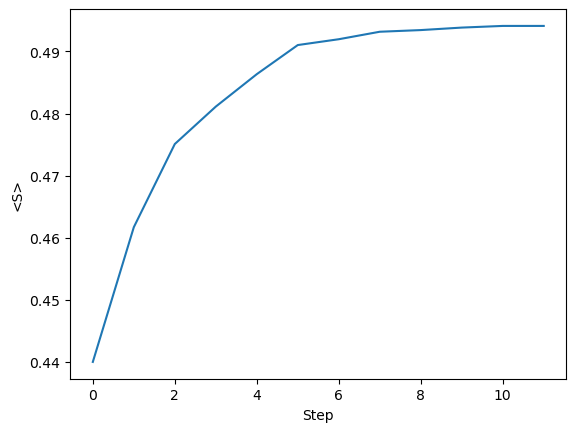

In [178]:
model_out.segregation.plot()
plt.xlabel("Step")
plt.ylabel("<S>")

For testing purposes, here is a table giving each agent's x and y values at each step.

In [179]:
x_positions = model.datacollector.get_agent_vars_dataframe()

In [180]:
x_positions.head()

x   y
Step AgentID        
1    0        38  28
     1         0   1
     2         0   2
     3         0   3
     4         0   4

# Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [181]:
from mesa import batch_run

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [182]:
fixed_params = {"height": 10, "width": 10, "density": 0.8, "minority_pc": 0.2}
variable_parms = {"homophily": range(1, 9)}

merged_params = {**fixed_params, **variable_parms}
merged_params 

{'height': 10,
 'width': 10,
 'density': 0.8,
 'minority_pc': 0.2,
 'homophily': range(1, 9)}

In [183]:
%% script False --no-raise-error

results = batch_run(
    Schelling,
    parameters = merged_params,
    iterations=10,
    max_steps=200,
)

results_df = pd.DataFrame(results)
results_df.head()

UsageError: Cell magic `%%` not found.


In [184]:
%% script False --no-raise-error

plt.scatter(results_df.homophily, results_df.segregation)
plt.xlabel("Homophily")
plt.ylabel("Average Happiness")
plt.grid(True)

UsageError: Cell magic `%%` not found.


In [185]:
get_distance((6,3), (0,1))

6.324555320336759

In [186]:
#create a random dictionary

import random

random_dict = {(random.randint(30,40), random.randint(30,40)): random.randint(0, 10) for i in range(10)}

random_dict

{(32, 33): 0,
 (31, 36): 10,
 (35, 36): 2,
 (34, 31): 8,
 (30, 40): 6,
 (35, 35): 8,
 (38, 38): 9,
 (36, 35): 3,
 (34, 38): 1,
 (35, 40): 9}

In [187]:
#sort the keys by ascending order of the value
sorted(random_dict, key = lambda x: random_dict[x], reverse = False)


[(32, 33),
 (34, 38),
 (35, 36),
 (36, 35),
 (30, 40),
 (34, 31),
 (35, 35),
 (38, 38),
 (35, 40),
 (31, 36)]

In [188]:
import random 
  
mylist = ["apple", "banana", "mango"] 
count_apple = 0
count_banana = 0
count_mango = 0  


for i in range(1000):

    r = random.choices(mylist, weights = [0.6, 0.6, 0.2], k = 6)[0]
    if r == "apple":
        count_apple += 1
    elif r == "banana":
        count_banana += 1
    else:
        count_mango += 1


In [189]:
count_apple, count_banana, count_mango

(413, 454, 133)

In [190]:
a = 0.0064565675675

#round to 2 decimal places
round(a, 2)

0.01